Après avoir géolocalisé des maternités selon deux années de référence, et dressé leur diagramme de Voronoï respectif, il est temps d'attaquer le gros morceau de ce tutoriel avec [des cartes isochrones](https://fr.wikipedia.org/wiki/Carte_isochrone). Pour rappel, nous sommes partis de la carte de France dressée par Cédric Rossi afin de chercher une voie similaire, malléable à nos propres besoins.

Sans plus attendre, nous allons importer les modules essentiels :

In [85]:
import json
import requests
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Rappel des calques de base

## Localisation des maternités en 2000

L'essentiel est dans le titre, et bête comme une nouvelle création de GeoDataFrame :

In [86]:
maternites = gpd.read_file("data/mat.json")
maternites = maternites[maternites["2000"]!=0].reset_index(drop=True)

## Diagramme de Voronoï lié

Nous allons faire de même avec le calque du diagramme de Voronoï correspondant, à partir du Shapefile remanié par nos soins précédemment :

In [87]:
voro_mat = gpd.read_file("raw/voro_mat00_bzh.shp")

Nous pouvons vérifier que tout est conforme avec une visualisation :

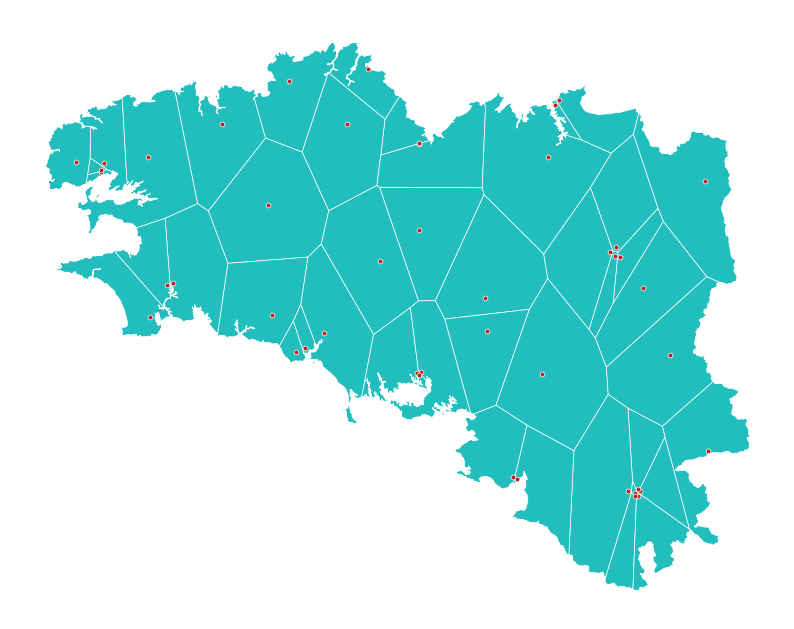

In [88]:
fig, ax = plt.subplots(figsize=(10,20))
voro_mat.plot(ax=ax,
              color="#22bebe",
              linewidth=.5,
              edgecolor="#fff")
maternites.plot(ax=ax,
                marker='o',
                markersize=12,
                color="#be2222",
                linewidth=.5,
                edgecolor="#fff")
ax.set_axis_off();

Rien ne dépasse, nous passons à la suite !

## Joint spatial entre les deux couches géographiques

Nous allons afficher les cinq première lignes de la GeoDataFrame maternites :

In [89]:
maternites.iloc[:5]

,NOM,STATUT,FI_ET,NOMCOM,ADRESSE,2000,2023,geometry
0,C.H.R. DE NANTES,PUBLIC,440000271,NANTES,1 PLACE ALEXIS RICORDEAU,3089,3962,POINT (-1.55470 47.20917)
1,CLINIQUE NOTRE-DAME-DE-GRACE,PRIVE LUCRATIF,440000446,NANTES,8 RUE FRANCIS MERLANT,2646,0,POINT (-1.57454 47.22136)
2,C.O.P. DE BREQUIGNY,PRIVE LUCRATIF,350003984,RENNES,2 AVENUE D'IRLANDE,2494,0,POINT (-1.68460 48.08752)
3,POLYCLINIQUE DE L ATLANTIQUE,PRIVE LUCRATIF,440033819,ST HERBLAIN,AVENUE CLAUDE BERNARD,2455,3438,POINT (-1.61270 47.22614)
4,C.H.R. : HOPITAL SUD,PUBLIC,350007084,RENNES,16 BOULEVARD DE BULGARIE,2347,3694,POINT (-1.65303 48.08299)


Cette dernière contient, outre la localisation des point, des informations contextuelles telles que nom, ou le statut. Ce n'est pas le cas de l'autre GDF, centrée sur le diagramme de Voronoï :

In [90]:
voro_mat.iloc[:5]

,index,geometry
0,5,"POLYGON ((-1.86391 48.50961, -1.94975 48.52824..."
1,6,"POLYGON ((-2.96246 48.45497, -2.93947 48.58623..."
2,7,"POLYGON ((-3.24940 48.75683, -3.24870 48.75731..."
3,11,"POLYGON ((-3.44044 47.84870, -3.39968 47.90969..."
4,13,"POLYGON ((-3.36071 48.08229, -3.79788 48.05957..."


Or, il nous faudrait au moins le nom de la maternité associée à chaque zone d'influence pour pouvoir **faire des rapprochements cohérents entre une maternité et sa zone d'influence**.

Et pour cela, [nous avons à disposition sjoin](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html), **une des fonctions les plus puisantes de Geopandas**.

Elle va nous permettre de lier aux zones les informations des points en une simple ligne de code :

In [91]:
voro_def = maternites.sjoin(voro_mat,how="right")[["NOM","geometry"]]
voro_def

/usr/lib/python3/dist-packages/geopandas/geodataframe.py:2187: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


,NOM,geometry
0,CENTRE HOSPITALIER BROUSSAIS,"POLYGON ((-1.86391 48.50961, -1.94975 48.52824..."
1,CLINIQUE SAINT FRANCOIS SA,"POLYGON ((-2.96246 48.45497, -2.93947 48.58623..."
2,CENTRE HOSPITALIER PAIMPOL,"POLYGON ((-3.24940 48.75683, -3.24870 48.75731..."
3,CENTRE HOSPITALIER BODELIO-\nLORIENT,"POLYGON ((-3.44044 47.84870, -3.39968 47.90969..."
4,CENTRE HOSPITALIER DE CARHAIX,"POLYGON ((-3.36071 48.08229, -3.79788 48.05957..."
5,CENTRE HOSPITALIER DE PLOERMEL,"POLYGON ((-2.66491 47.92325, -2.39854 48.31124..."
6,C.H.I.C. PLEMET LOUDEAC,"POLYGON ((-2.75649 47.92196, -2.96962 48.33779..."
7,CENTRE HOSPITALIER DE PONTIVY,"POLYGON ((-2.80079 47.89762, -3.00196 47.79870..."
8,CLINIQUE DES AUGUSTINES-\nMALESTROIT,"POLYGON ((-2.61313 47.85564, -2.15045 47.89156..."
9,CENTRE HOSPITALIER DE REDON,"POLYGON ((-1.82422 47.81751, -1.79007 47.78624..."


# Test sur un seul Voronoi

Pour la suite, nous allons nous pencher sur la première zone du diagramme de Voronoï :

In [92]:
voro_test = voro_def.iloc[[0]]
voro_test

,NOM,geometry
0,CENTRE HOSPITALIER BROUSSAIS,"POLYGON ((-1.86391 48.50961, -1.94975 48.52824..."


Le nom de la maternité reliée juste avant va nous permettre de récupérer le point correspondant dans l'autre GDF :

In [93]:
mat_test = maternites[maternites["NOM"]==voro_test.iloc[0]["NOM"]]
mat_test

,NOM,STATUT,FI_ET,NOMCOM,ADRESSE,2000,2023,geometry
25,CENTRE HOSPITALIER BROUSSAIS,PUBLIC,350000147,ST MALO,1 RUE DE LA MARNE,841,1497,POINT (-2.00804 48.63786)


Nous pouvons visualiser que tout est cohérent :

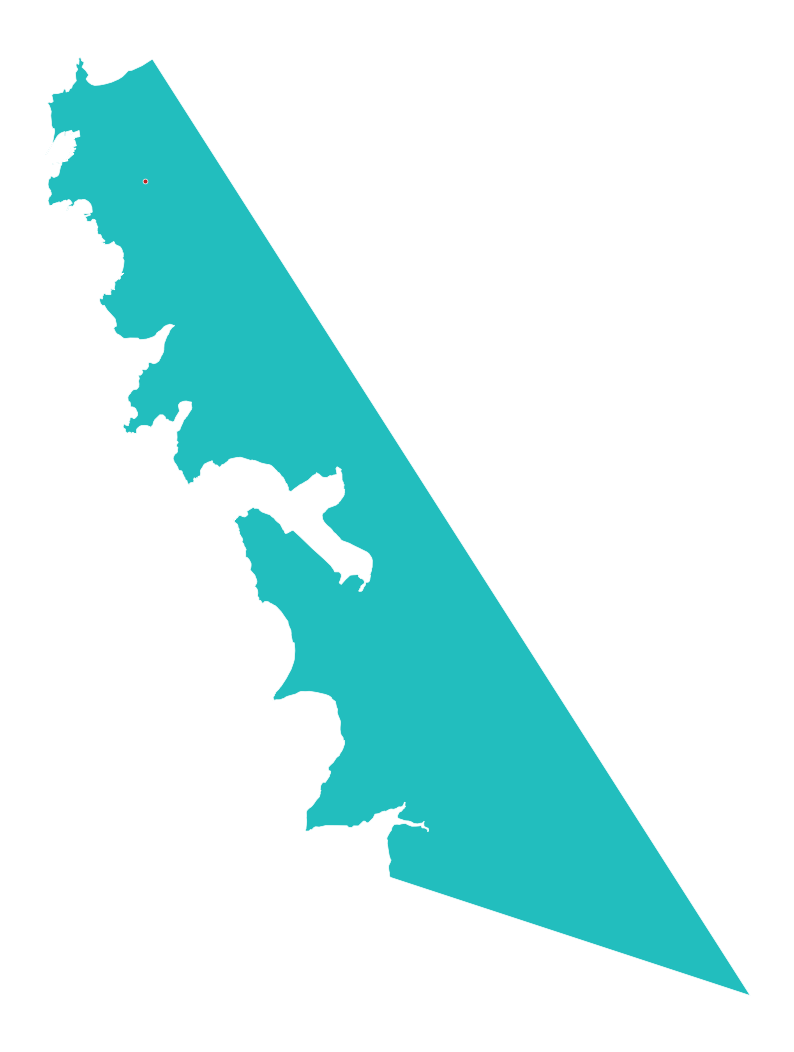

In [94]:
fig, ax = plt.subplots(figsize=(10,20))
voro_test.plot(ax=ax,
              color="#22bebe",
              linewidth=.5,
              edgecolor="#fff")
mat_test.plot(ax=ax,
                marker='o',
                markersize=12,
                color="#be2222",
                linewidth=.5,
                edgecolor="#fff")
ax.set_axis_off();

Et à présent, quelques variables complémentaires en prévision de ce qui nous attend :
* les longitude et la latitude de la maternité cible
* un délai maximum de référence

In [95]:
lon, lat = str(mat_test.iloc[0]["geometry"].x),str(mat_test["geometry"].iloc[0].y)
time_ref = 5

Nous allons prendre un petit moment pour décrire la solution retenue pour ces fameux isochrones. [Valhalla propose un engin de routage open source](https://github.com/valhalla/valhalla) taillé pour OpenStreetMap. Il coche les **principales cases d'une réutilisation optimale** (si on fait abstraction de la faute de goût d'arborer un valknut en logo), mais est compliqué à implémenter en local.

Par chance, l'Institut national de l'information géographique et forestière (IGN) [propose parmi ses services](https://geoservices.ign.fr/documentation/services/services-geoplateforme/itineraire) une API de calcul d'isochrones basée sur Valhalla.
[La documentation](https://www.geoportail.gouv.fr/depot/swagger/itineraire.html#/Utilisation/isochrone) spécifie les paramètres obligatoires :
* le **point à considérer**, avec ses longitude et latitude
* la **ressource à utiliser**. Dans le cas de Valhalla, cela se traduit par *bdtopo-valhalla* dans la syntaxe de l'API
* la **"valeur de coût"**. Dans ce test, nous avons pris 5 en référence
* le **"type de coût"**. Nous pouvons calculer **aussi bien en temps** (par défaut en minutes) **qu'en distance** (par défaut en mètres). Ici, nous choisissons le temps, autrement dit : 5 minutes maximum
Nous pouvons personnaliser d'autres choses, par exemple la direction du trajet. Dans notre cas, **la maternité est considérée comme un point d'arrivée**, et c'est donc ainsi que nous allons caractériser le trajet

Et ensuite ? Ensuite, il suffit juste d'envoyer la bonne URL avant de récupérer le résultat en JSON. Nous allons dans l'ordre envoyer une requête GET grâce au module request, puis formater en DataFrame le JSON correspondant :

In [96]:
r_test = requests.get(f"https://data.geopf.fr/navigation/isochrone?point={lon}%2C{lat}&resource=bdtopo-valhalla&costValue={str(time_ref)}&costType=time&profile=car&direction=arrival&constraints=%7B%22constraintType%22%3A%22banned%22%2C%22key%22%3A%22wayType%22%2C%22operator%22%3A%22%3D%22%2C%22value%22%3A%22autoroute%22%7D&geometryFormat=geojson&distanceUnit=meter&timeUnit=minute&crs=EPSG%3A4326")
df_test = pd.json_normalize(r_test.json())
df_test

,point,resource,resourceVersion,costType,costValue,timeUnit,profile,direction,crs,constraints,geometry.coordinates,geometry.type
0,"-2.0080408,48.6378598",bdtopo-valhalla,2025-09-04,time,5,minute,car,arrival,EPSG:4326,"[{'type': 'banned', 'key': 'waytype', 'operato...","[[[-2.008041, 48.646133], [-2.008761, 48.64558...",Polygon


Tout ceci est bel et bon, mais nous allons simplifier tout ça et surtout calculer une géométrie de ce nom à partir des coordonnées renvoyées dans la colonne geometry.coordinates :

In [97]:
df_test["NOM"] = mat_test.iloc[0]["NOM"]
df_test["geometry"] = [Polygon(coords)
                       for l
                       in df_test["geometry.coordinates"]
                       for coords
                       in l]
df_test = df_test[["NOM",
                   "costValue",
                   "geometry"]]
df_test = gpd.GeoDataFrame(df_test,
                           geometry=df_test["geometry"])
df_test

,NOM,costValue,geometry
0,CENTRE HOSPITALIER BROUSSAIS,5,"POLYGON ((-2.00804 48.64613, -2.00876 48.64558..."


Et la musique commence à être connue : après une manipulation, rien de telle qu'une visualisation !

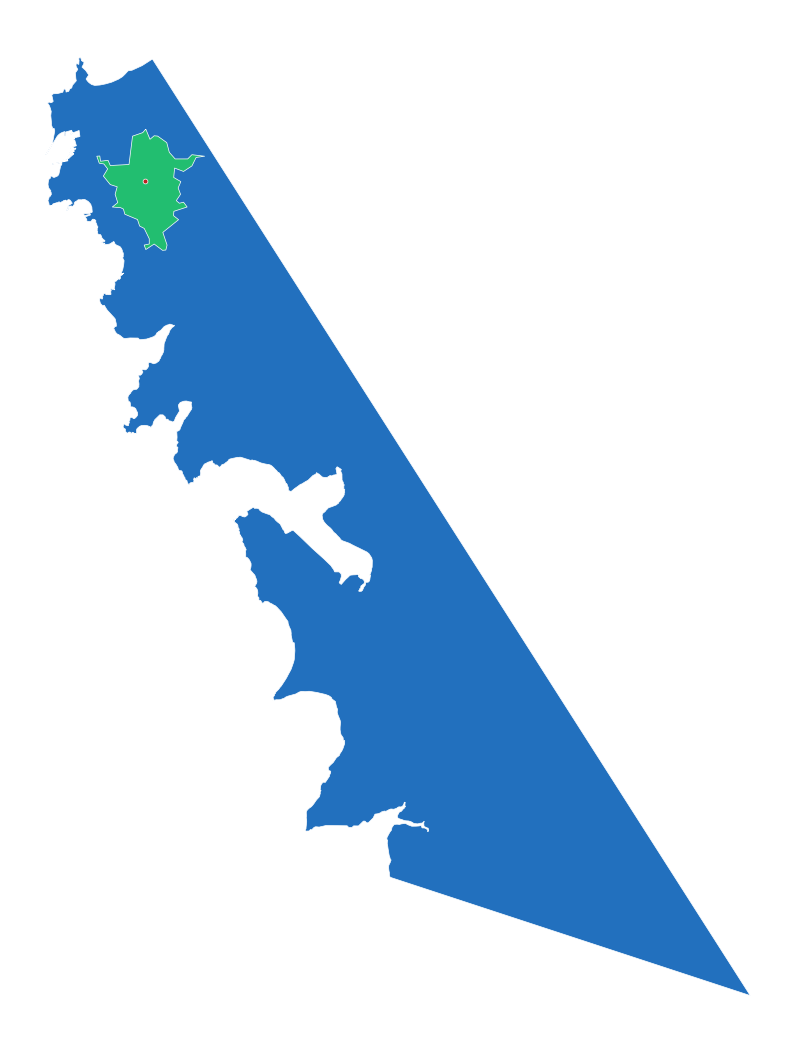

In [98]:
fig, ax = plt.subplots(figsize=(10,20))
voro_test.plot(ax=ax,
               color="#2270be",
               linewidth=.5,
               edgecolor="#fff")
df_test["geometry"].plot(ax=ax,
                         color="#22be70",
                         linewidth=.5,
                         edgecolor="#fff")
mat_test.plot(ax=ax,
              marker='o',
              markersize=12,
              color="#be2222",
              linewidth=.5,
              edgecolor="#fff")
ax.set_axis_off();

Nous pouvons dès à présent dérouler sur différentes durées de trajet à l'aide d'une boucle for, et d'ajouter chaque zone calculée dans une nouvelle DataFrame :

In [99]:
trajets = pd.DataFrame()
for cvalue in ["5","10","15","20","30","40","50"]:
  r = requests.get(f"https://data.geopf.fr/navigation/isochrone?point={lon}%2C{lat}&resource=bdtopo-valhalla&costValue={cvalue}&costType=time&profile=car&direction=arrival&constraints=%7B%22constraintType%22%3A%22banned%22%2C%22key%22%3A%22wayType%22%2C%22operator%22%3A%22%3D%22%2C%22value%22%3A%22autoroute%22%7D&geometryFormat=geojson&distanceUnit=meter&timeUnit=minute&crs=EPSG%3A4326")
  df = pd.json_normalize(r.json())
  df["NOM"] = mat_test.iloc[0]["NOM"]
  df["geometry"] = [Polygon(coords)
                    for l
                    in df["geometry.coordinates"]
                    for coords
                    in l]
  df = df[["NOM",
           "costValue",
           "geometry"]]
  trajets = pd.concat([trajets,df],
                      ignore_index=True)

In [100]:
trajets = gpd.GeoDataFrame(trajets,geometry=trajets["geometry"])
trajets

,NOM,costValue,geometry
0,CENTRE HOSPITALIER BROUSSAIS,5,"POLYGON ((-2.00804 48.64613, -2.00876 48.64558..."
1,CENTRE HOSPITALIER BROUSSAIS,10,"POLYGON ((-2.00804 48.65498, -2.00847 48.65429..."
2,CENTRE HOSPITALIER BROUSSAIS,15,"POLYGON ((-1.95804 48.66626, -1.95900 48.66581..."
3,CENTRE HOSPITALIER BROUSSAIS,20,"POLYGON ((-1.93204 48.69004, -1.93404 48.69039..."
4,CENTRE HOSPITALIER BROUSSAIS,30,"POLYGON ((-1.84604 48.70900, -1.84804 48.70719..."
5,CENTRE HOSPITALIER BROUSSAIS,40,"POLYGON ((-1.84604 48.71261, -1.84854 48.71236..."
6,CENTRE HOSPITALIER BROUSSAIS,50,"POLYGON ((-1.84604 48.71272, -1.84877 48.71259..."


Ce découpage mis à jour délai par délai présente un inconvénient : il risque de faire disparaître des zones plus petites si elles sont déclarées avant des zones plus large. Démonstration ci-dessous :

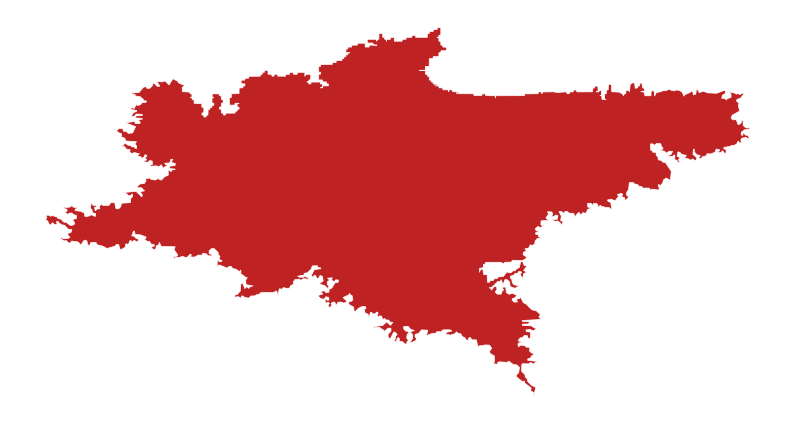

In [101]:
fig, ax = plt.subplots(figsize=(10,20))
voro_test.plot(ax=ax,
               color="#2270be",
               linewidth=.5,
               edgecolor="#fff")
df_test["geometry"].plot(ax=ax,
                         color="#22be70",
                         linewidth=.5,
                         edgecolor="#fff")
trajets.plot(ax=ax,
              marker='o',
              markersize=12,
              color="#be2222",
              linewidth=.5,
              edgecolor="#fff")
ax.set_axis_off();

Comme souvent dans ce genre de projets, **il y a différentes manières d'arriver au même résultat**.

Une première solution de petit malin consisterait **à trier les zones dans l'ordre décroissant de délai** : la plus large apparaîtrait la première, suivie par la deuxième plus large, et ainsi de suite. Cela donne, pour être concret :

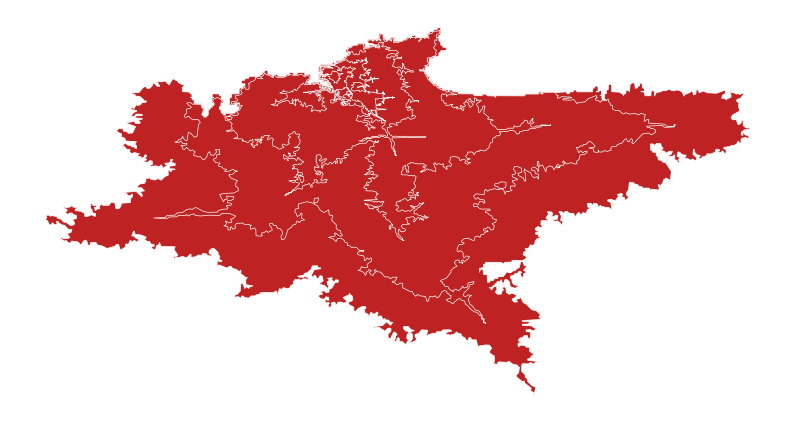

In [102]:
trajets_tries = trajets.copy().sort_values(by="costValue",
                              ascending=False).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10,20))
voro_test.plot(ax=ax,
               color="#2270be",
               linewidth=.5,
               edgecolor="#fff")
df_test["geometry"].plot(ax=ax,
                         color="#22be70",
                         linewidth=.5,
                         edgecolor="#fff")
trajets_tries.plot(ax=ax,
              marker='o',
              markersize=12,
              color="#be2222",
              linewidth=.5,
              edgecolor="#fff")
ax.set_axis_off();

Mais nous allons jouer aux plus malins et **rogner chaque zone plus large que la précédente** à l'aide de la fonction geopandas [symetric_difference](https://geopandas.org/en/v1.1.1/docs/reference/api/geopandas.GeoSeries.symmetric_difference.html).

Exemple concret entre la troisième et la deuxième zone de la GeoDataFrame trajets :

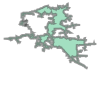

In [103]:
trajets.iloc[[2]].symmetric_difference(trajets.iloc[1]["geometry"]).iloc[0]

Les géométries de chaque zone rognée peuvent se rassembler dans une liste en commençant par la fin, et en excluant la première valeur car il n'y a rien à rogner dessus :

In [104]:
geo_sub = [trajets.iloc[[i]].symmetric_difference(trajets.iloc[i-1]["geometry"]).iloc[0]
           for i
           in range(len(trajets)-1,0,-1)]

Nous pouvons désormais ajouter la première valeur à notre liste précédente (inversée pour respecter l'ordre des géométries) :

In [105]:
geo_sub = [trajets.iloc[0]["geometry"]]+list(reversed(geo_sub))
geo_sub

[<POLYGON ((-2.008 48.646, -2.009 48.646, -2.011 48.645, -2.012 48.641, -2.01...>,
 <POLYGON ((-2.007 48.655, -2.008 48.654, -2.006 48.653, -2.004 48.653, -2.00...>,
 <MULTIPOLYGON (((-2.027 48.64, -2.027 48.643, -2.026 48.643, -2.026 48.645, ...>,
 <MULTIPOLYGON (((-2.028 48.64, -2.028 48.644, -2.026 48.644, -2.03 48.644, -...>,
 <MULTIPOLYGON (((-2.03 48.644, -2.03 48.652, -2.028 48.652, -2.028 48.654, -...>,
 <MULTIPOLYGON (((-1.93 48.698, -1.93 48.695, -1.927 48.695, -1.927 48.692, -...>,
 <MULTIPOLYGON (((-1.939 48.695, -1.939 48.704, -1.933 48.704, -1.933 48.698,...>]

Tous les voyants sont au vert pour créer une nouvelle GeoDataFrame de test avec ces géométries, et les délais correspondants :

In [106]:
test = gpd.GeoDataFrame(["5","10","15","20","30","40","50"],geometry=geo_sub)
test

,0,geometry
0,5,"POLYGON ((-2.00804 48.64613, -2.00876 48.64558..."
1,10,"POLYGON ((-2.00713 48.65486, -2.00764 48.65386..."
2,15,"MULTIPOLYGON (((-2.02679 48.64011, -2.02678 48..."
3,20,"MULTIPOLYGON (((-2.02773 48.64017, -2.02773 48..."
4,30,"MULTIPOLYGON (((-2.02985 48.64405, -2.02983 48..."
5,40,"MULTIPOLYGON (((-1.93036 48.69754, -1.93014 48..."
6,50,"MULTIPOLYGON (((-1.93894 48.69486, -1.93880 48..."


Nous créons au passage un petit dictionnaire de correspondance afin de colorer tout ça (la palette est chipée [sur ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)) :

In [107]:
corres_couleurs = {"5":"#1a9850",
                   "10":"#91cf60",
                   "15":"#d9ef8b",
                   "20":"#ffffbf",
                   "30":"#fee08b",
                   "40":"#fc8d59",
                   "50":"#d73027"}

Visualisons le résultat :

<AxesSubplot: >

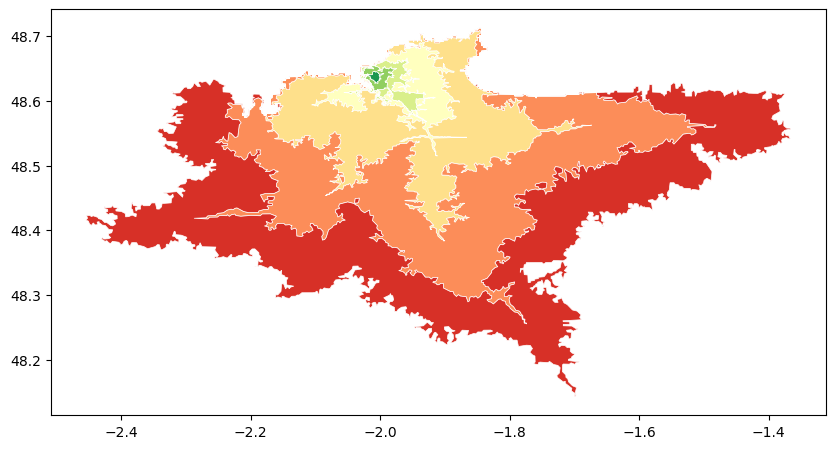

In [108]:
fig, ax = plt.subplots(figsize=(10,20))
test.plot(ax=ax,
          color=test[0].map(corres_couleurs),
          linewidth=.5,
          edgecolor="#fff")

Conforme en tout point, nous allons donc remplacer la géométrie de trajets sans aucun scrupule :

In [109]:
trajets["geometry"] = test["geometry"]

Nous allons commenter la visualisation suivante :

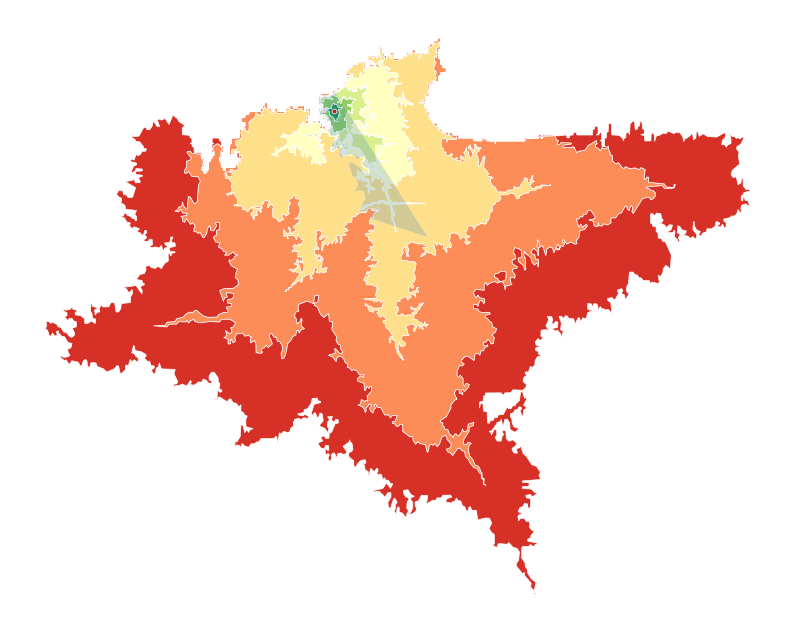

In [110]:
fig, ax = plt.subplots(figsize=(10,20))
trajets.plot(ax=ax,color=trajets["costValue"].astype(str).map(corres_couleurs),linewidth=.5, edgecolor="#fff")
voro_test.plot(ax=ax,color="#2270be",linewidth=.5, edgecolor="#fff",alpha=.2)
mat_test.plot(ax=ax, marker='o', markersize=12, color="#be2222",linewidth=.5, edgecolor="#fff")
ax.set_axis_off();

L'enjeu est maintenant de modifier (une dernière fois) les différentes géométries associées aux temps de trajets pour qu'elle ne déborde pas de la zone d'influence. Cette fois, c'est la fonction [intersection](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersection.html) qui va prévaloir :

In [111]:
geo_intersection = [test.iloc[[i]].intersection(voro_test.iloc[0]["geometry"]).iloc[0]
                    for i
                    in range(0,
                             len(test))]
print(geo_intersection)

[<POLYGON ((-2.007 48.645, -2.006 48.645, -2.005 48.645, -2.003 48.644, -2.00...>, <POLYGON ((-2.008 48.654, -2.006 48.653, -2.004 48.653, -2.002 48.652, -2 48...>, <MULTIPOLYGON (((-2.027 48.641, -2.027 48.641, -2.027 48.641, -2.027 48.641,...>, <MULTIPOLYGON (((-2.028 48.641, -2.028 48.641, -2.027 48.641, -2.027 48.641,...>, <MULTIPOLYGON (((-2.03 48.645, -2.03 48.646, -2.03 48.646, -2.03 48.652, -2....>, <MULTIPOLYGON (((-2.03 48.644, -2.03 48.645, -2.03 48.644, -2.03 48.644, -2....>, <MULTIPOLYGON (((-2.03 48.644, -2.03 48.644, -2.03 48.644, -2.03 48.644, -2....>]


Vérifions de suite le bon déroulé de ces opérations en mettant à jour la colonne *geometry* de trajets avec ces nouvelles zones, en purgeant bien celles qui sont vides :

In [112]:
trajets["geometry"] = geo_intersection
trajets = trajets[~trajets["geometry"].is_empty].reset_index(drop=True)
trajets

,NOM,costValue,geometry
0,CENTRE HOSPITALIER BROUSSAIS,5,"POLYGON ((-2.00704 48.64453, -2.00604 48.64508..."
1,CENTRE HOSPITALIER BROUSSAIS,10,"POLYGON ((-2.00764 48.65386, -2.00579 48.65311..."
2,CENTRE HOSPITALIER BROUSSAIS,15,"MULTIPOLYGON (((-2.02679 48.64110, -2.02662 48..."
3,CENTRE HOSPITALIER BROUSSAIS,20,"MULTIPOLYGON (((-2.02773 48.64098, -2.02758 48..."
4,CENTRE HOSPITALIER BROUSSAIS,30,"MULTIPOLYGON (((-2.02985 48.64548, -2.02974 48..."
5,CENTRE HOSPITALIER BROUSSAIS,40,"MULTIPOLYGON (((-2.03027 48.64398, -2.02985 48..."
6,CENTRE HOSPITALIER BROUSSAIS,50,"MULTIPOLYGON (((-2.03028 48.64395, -2.03027 48..."


Plus qu'à visualiser :

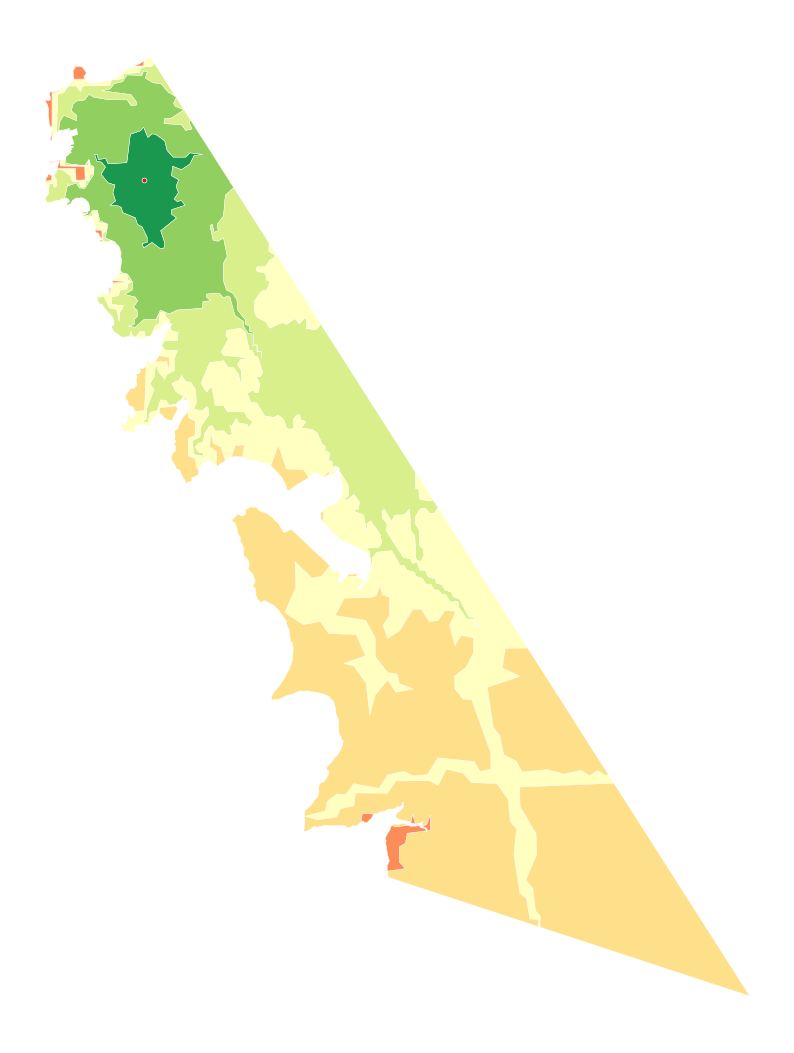

In [113]:
fig, ax = plt.subplots(figsize=(10,20))
trajets.plot(ax=ax,
             color=trajets["costValue"].astype(str).map(corres_couleurs),
             linewidth=.3,
             edgecolor="#fff")
mat_test.plot(ax=ax,
             marker='o',
             markersize=12,
             color="#be2222",
             linewidth=.5,
             edgecolor="#fff")
ax.set_axis_off();

Nous sommes bien partis, mais il reste encore du pain sur la planche.

# Factorisation

Il faut être honnête : ce qui a été écrit avant est plutôt costaud. Afin de **simplifier la réexploitation de tout ce qui a été fait**, nous allons (contrairement aux IA génératives) repenser le code précédent, en utilisant au maximum des fonctions.

En gros, **une fonction pour chaque tâche bien identifiée**, en démarrant de la plus simple à la plus complexes. Quelques notes de syntaxe avant de dérouler :
- nous spécifierons autant que possible le format attendu des variables et du résultat retournée par la fonction dès sa définition (par exemple : *def multipliepar2(nombre:int) -> int:*)
- [la rédaction de docstrings](https://peps.python.org/pep-0257/) afin de décrire textuellement la fonction
- des [try/except](https://docs.python.org/3/tutorial/errors.html) afin de gérer les exceptions et autres erreurs

Ces bonnes pratiques énoncées, nous pouvons créer une première fonction répondant à ces canons :

In [114]:
def filter_voro_points(i:int,
                       polygdf:gpd.geodataframe.GeoDataFrame,
                       ptgdf:gpd.geodataframe.GeoDataFrame,
                       comcol:str) -> list:
  """
     Cette fonction renvoie une liste de deux GeoDataFrames :
        - une DF d'une ligne de polygones Voronoï
        - le centre correspondant
  """
  try:
    row_voro = polygdf.iloc[[i]].reset_index(drop=True)
    row_point = ptgdf[ptgdf[comcol].astype(str)==str(row_voro.iloc[0][comcol])].reset_index(drop=True)
    return [row_voro,row_point]
  except Exception as e:
    print(f"La fonction filter_voro_points a planté en raison d'une {e}")

Et après chaque codage de fonction, nous testons :

In [115]:
voro_point = filter_voro_points(0,
                                voro_def,
                                maternites,
                                "NOM")
voro_point

[                            NOM  \
 0  CENTRE HOSPITALIER BROUSSAIS   
 
                                             geometry  
 0  POLYGON ((-1.86391 48.50961, -1.94975 48.52824...  ,
                             NOM  STATUT      FI_ET   NOMCOM  \
 0  CENTRE HOSPITALIER BROUSSAIS  PUBLIC  350000147  ST MALO   
 
              ADRESSE  2000  2023                   geometry  
 0  1 RUE DE LA MARNE   841  1497  POINT (-2.00804 48.63786)  ]

Nous enchaînons avec le reformatage des coordonnées associées à une maternité :

In [116]:
def lat_lon_voropoint(row_point:gpd.geodataframe.GeoDataFrame) -> tuple:
  """
      Cette fonction retourne les latitudes et longitude formatées en chaîne de caractères depuis une GeoDataFrame
      à une ligne (un point)
  """
  try:
    lat, lon = str(row_point.iloc[0]["geometry"].x),str(row_point["geometry"].iloc[0].y)
    return lat, lon
  except Exception as e:
    print(f"La fonction lat_lon_voropoint a planté en raison d'une {e}")

Et nous testons :

In [117]:
coords = lat_lon_voropoint(voro_point[1])
coords

('-2.0080408', '48.6378598')

Nous pouvons à présent passer aux isochrones

In [118]:
def gdf_isochrone(pointgdf:gpd.geodataframe.GeoDataFrame,
                  col_ref:str,
                  coord:tuple,
                  durations:list) -> gpd.geodataframe.GeoDataFrame:
  """
      Cette fonction génère des isochrones de durée à partir d'une GeoDataFrame de point.
      Les paramètres attendus sont :
         - une GeoDataFrame de référence
         - une colonne pour ajouter une information de référence (par exemple : le nom du point considérée)
         - des coordonnées sous la forme d'un tuple de deux chiffres décimaux
         - une liste contenant les durées de trajet maximales
  """
  try:
    isochrones = pd.DataFrame()
    for cvalue in durations:
      r = requests.get(f"https://data.geopf.fr/navigation/isochrone?point={coord[0]}%2C{coord[1]}&resource=bdtopo-valhalla&costValue={cvalue}&costType=time&profile=car&direction=arrival&constraints=%7B%22constraintType%22%3A%22banned%22%2C%22key%22%3A%22wayType%22%2C%22operator%22%3A%22%3D%22%2C%22value%22%3A%22autoroute%22%7D&geometryFormat=geojson&distanceUnit=meter&timeUnit=minute&crs=EPSG%3A4326")
      df = pd.json_normalize(r.json())
      df[col_ref] = pointgdf.iloc[0][col_ref]
      df["geometry"] = [Polygon(coords) for l in df["geometry.coordinates"] for coords in l]
      df = df[[col_ref,"costValue","geometry"]]
      isochrones = pd.concat([isochrones,df],ignore_index=True)
    return gpd.GeoDataFrame(isochrones,geometry=isochrones["geometry"])
  except Exception as e:
    print(f"La fonction gdf_isochrone a planté en raison d'une {e}")

Et nous déroulons avec le calcul de six isochrones :

In [119]:
trajet_broussais = gdf_isochrone(voro_point[1],
                              "NOM",
                              coords,
                               ["5","10","15","20","30","40","50"])
trajet_broussais

,NOM,costValue,geometry
0,CENTRE HOSPITALIER BROUSSAIS,5,"POLYGON ((-2.00804 48.64613, -2.00876 48.64558..."
1,CENTRE HOSPITALIER BROUSSAIS,10,"POLYGON ((-2.00804 48.65498, -2.00847 48.65429..."
2,CENTRE HOSPITALIER BROUSSAIS,15,"POLYGON ((-1.95804 48.66626, -1.95900 48.66581..."
3,CENTRE HOSPITALIER BROUSSAIS,20,"POLYGON ((-1.93204 48.69004, -1.93404 48.69039..."
4,CENTRE HOSPITALIER BROUSSAIS,30,"POLYGON ((-1.84604 48.70900, -1.84804 48.70719..."
5,CENTRE HOSPITALIER BROUSSAIS,40,"POLYGON ((-1.84604 48.71261, -1.84854 48.71236..."
6,CENTRE HOSPITALIER BROUSSAIS,50,"POLYGON ((-1.84604 48.71272, -1.84877 48.71259..."


Tout est prêt pour la visualisation :

<AxesSubplot: >

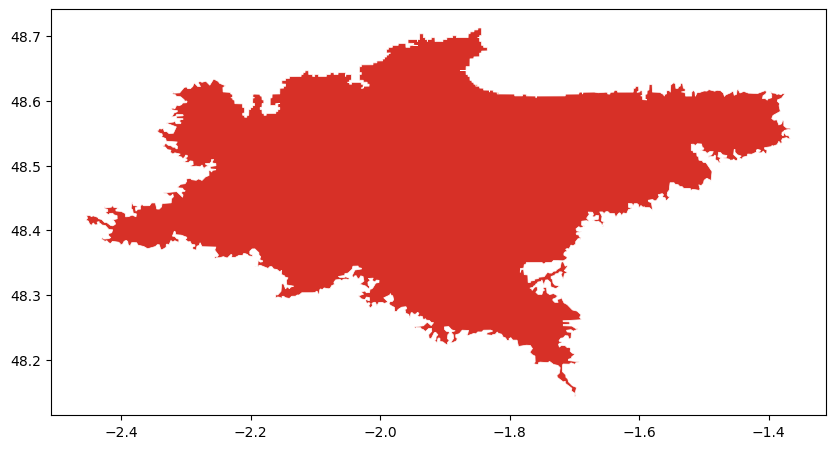

In [120]:
fig, ax = plt.subplots(figsize=(10,20))
trajet_broussais.plot(ax=ax,
                   color=trajet_broussais["costValue"].astype(str).map(corres_couleurs),
                   linewidth=.5,edgecolor="#fff")

Nouvelle fonction, cette fois avec les différences entre grandes et plus petites zones :

In [121]:
def poly_puzzle(gdf:gpd.geodataframe.GeoDataFrame) -> gpd.geodataframe.GeoDataFrame:
  """
      Cette fonction désempile des géométries qui se recoupent afin de les transformer comme un puzzle de pièces concentriques mais qui ne se superposent pas.
  """
  try:
    geo_sub = [gdf.iloc[[i]].symmetric_difference(gdf.iloc[i-1]["geometry"]).iloc[0]
               for i in range(len(gdf)-1,0,-1)]
    geo_sub = [gdf.iloc[0]["geometry"]]+list(reversed(geo_sub))
    gdf["geometry"] = geo_sub
    return gdf
  except Exception as e:
    print(f"La fonction poly_puzzle a planté en raison d'une {e}")

Avant-dernier test :

<AxesSubplot: >

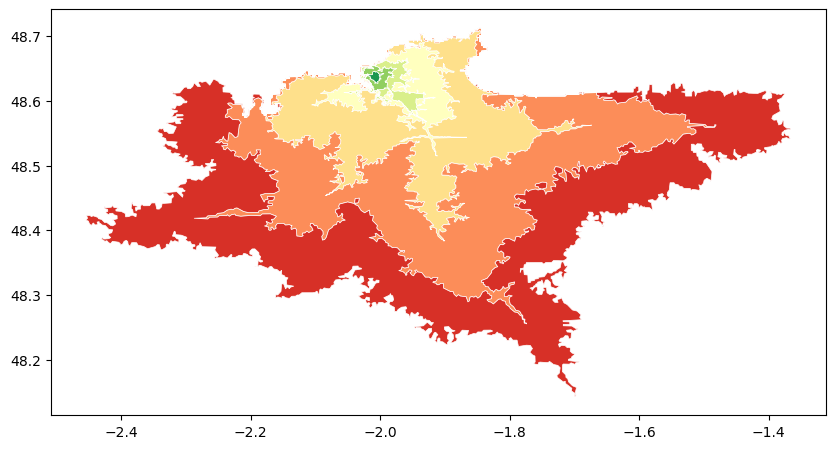

In [122]:
trajet_broussais = poly_puzzle(trajet_broussais)
fig, ax = plt.subplots(figsize=(10,20))
trajet_broussais.plot(ax=ax, color=trajet_broussais["costValue"].astype(str).map(corres_couleurs), linewidth=.5,edgecolor="#fff")

Et à présent, le dernier morceau : la soustraction des isochrones global sur une zone d'influence :

In [123]:
def diff_poly(largegdf:gpd.geodataframe.GeoDataFrame,
              minorgdf:gpd.geodataframe.GeoDataFrame) -> gpd.geodataframe.GeoDataFrame:
  """
      Cette fonction renvoie l'intersection d'une GeoDataFrame à un une seule zone avec une plus grande GDF composée de plusieurs zones.
  """
  try:
    geo_intersection = [largegdf.iloc[[i]].intersection(minorgdf.iloc[0]["geometry"]).iloc[0]
                        for i
                        in range(0,len(largegdf))]
    largegdf["geometry"] = geo_intersection
    largegdf = largegdf[~largegdf["geometry"].is_empty].reset_index(drop=True)
    return largegdf
  except Exeption as e:
    print(f"La fonction diff_poly a planté en raison d'une {e}")

L'heure de l'utime test a désormais sonné :

<AxesSubplot: >

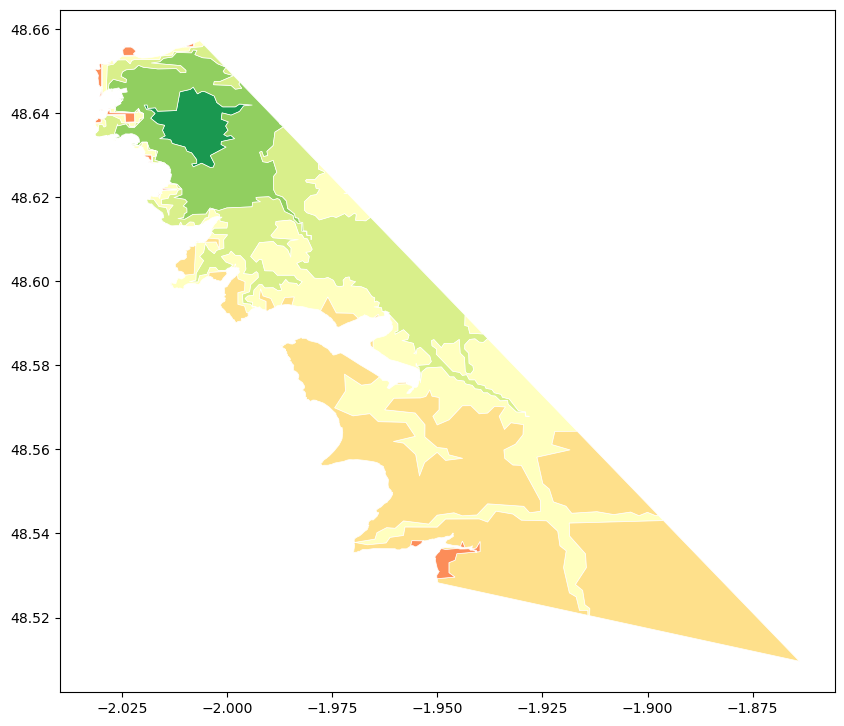

In [124]:
trajet_broussais = diff_poly(trajet_broussais,voro_point[0])
fig, ax = plt.subplots(figsize=(10,20))
trajet_broussais.plot(ax=ax,
                   color=trajet_broussais["costValue"].astype(str).map(corres_couleurs),
                   linewidth=.5,
                   edgecolor="#fff")

La factorisation a bien fonctionné, nous pouvons lancer les yeux (presque) fermés une boucle for afin de calculer les isochrones associés à chaque maternité répertoriée en 2000 :

In [125]:
# nous allons remplir au fur et à mesure une DataFrame, paramétrée dès le début
iso_bzh = pd.DataFrame()
for i in range(len(voro_def)):
  voro_point = filter_voro_points(i,
                                  voro_def,
                                  maternites,
                                  "NOM")
  coords = lat_lon_voropoint(voro_point[1])
  trajets_voro = gdf_isochrone(voro_point[1],
                               "NOM",
                               coords,
                                ["10","20","30","50","70","90"])
  print(trajets_voro["NOM"].unique()[0])
  trajets_voro = poly_puzzle(trajets_voro)
  trajets_voro = diff_poly(trajets_voro,
                           voro_point[0])
  iso_bzh = pd.concat([iso_bzh,trajets_voro],
                      ignore_index=True)

CENTRE HOSPITALIER BROUSSAIS
CLINIQUE SAINT FRANCOIS SA
CENTRE HOSPITALIER PAIMPOL
CENTRE HOSPITALIER BODELIO-
LORIENT
CENTRE HOSPITALIER DE CARHAIX
CENTRE HOSPITALIER DE PLOERMEL
C.H.I.C. PLEMET LOUDEAC
CENTRE HOSPITALIER DE PONTIVY
CLINIQUE DES AUGUSTINES-
MALESTROIT
CENTRE HOSPITALIER DE REDON
CLINIQUE DE L'ESPERANCE
ET. SOINS  LA-SAGESSE   RENNES
CENTRE HOSPITALIER CHATEAUBRIANT
CLINIQUE PASTEUR - SAINT ESPRIT
CHRU HOPITAL MORVAN
C.H.R. : HOPITAL SUD
C.O.P. DE BREQUIGNY
CTRE HOSPITALIER VITRE
C.H.R. : HOTEL DIEU
CLINIQUE DU DR BRETECHE
CENTRE HOSPITALIER - ANCENIS
CLINIQUE DE LA HAUTE-FORET
CLINIQUE MUTUAL.CHIR. MELLINET
CLINIQUE NOTRE-DAME-DE-GRACE
POLYCLINIQUE DE L ATLANTIQUE
CLINIQUE DU JARDIN DES PLANTES
CTRE HOSP. DES PAYS DE MORLAIX
HOTEL DIEU DE PONT-L'ABBE
CLINIQUE DU TER
CENTRE HOSPITALIER
MATERNITE STE CLAIRE
POLYCLINIQUE DU PARC
CENTRE HOSPITALIER LANNION
POLYCLINIQUE DE KERAUDREN
CENTRE HOSPITALIER DE QUIMPERLE
CENTRE HOSPITALIER GUINGAMP
CENTRE HOSPITALIER DE ST-BRIEUC

Vérifions la structure générale de notre GeoDataFrame :

In [126]:
iso_bzh

,NOM,costValue,geometry
0,CENTRE HOSPITALIER BROUSSAIS,10,"POLYGON ((-2.02821 48.64570, -2.02808 48.64690..."
1,CENTRE HOSPITALIER BROUSSAIS,20,"MULTIPOLYGON (((-1.92204 48.56425, -1.92277 48..."
2,CENTRE HOSPITALIER BROUSSAIS,30,"MULTIPOLYGON (((-2.02985 48.64548, -2.02974 48..."
3,CENTRE HOSPITALIER BROUSSAIS,50,"MULTIPOLYGON (((-2.03028 48.64395, -2.02985 48..."
4,CENTRE HOSPITALIER BROUSSAIS,70,"MULTIPOLYGON (((-2.02441 48.65573, -2.02467 48..."
...,...,...,...
239,C.H.R. DE NANTES,10,"MULTIPOLYGON (((-1.56288 47.21517, -1.56297 47..."
240,C.H.R. DE NANTES,20,"MULTIPOLYGON (((-1.50491 47.19517, -1.50492 47..."
241,C.H.R. DE NANTES,30,"POLYGON ((-1.45531 47.17178, -1.45632 47.16880..."
242,C.H.R. DE NANTES,50,"MULTIPOLYGON (((-1.29070 47.09322, -1.29330 47..."


Plus qu'à paramétrer une nouvelle palette de couleurs...

In [127]:
corres_couleurs = {"10":"#1a9641",
                   "20":"#a6d96a",
                   "30":"#ffffbf",
                   "50":"#fdae61",
                   "70":"#d7191c",
                   "90":"#000"}

...avant de visualiser l'ensemble :

<AxesSubplot: >

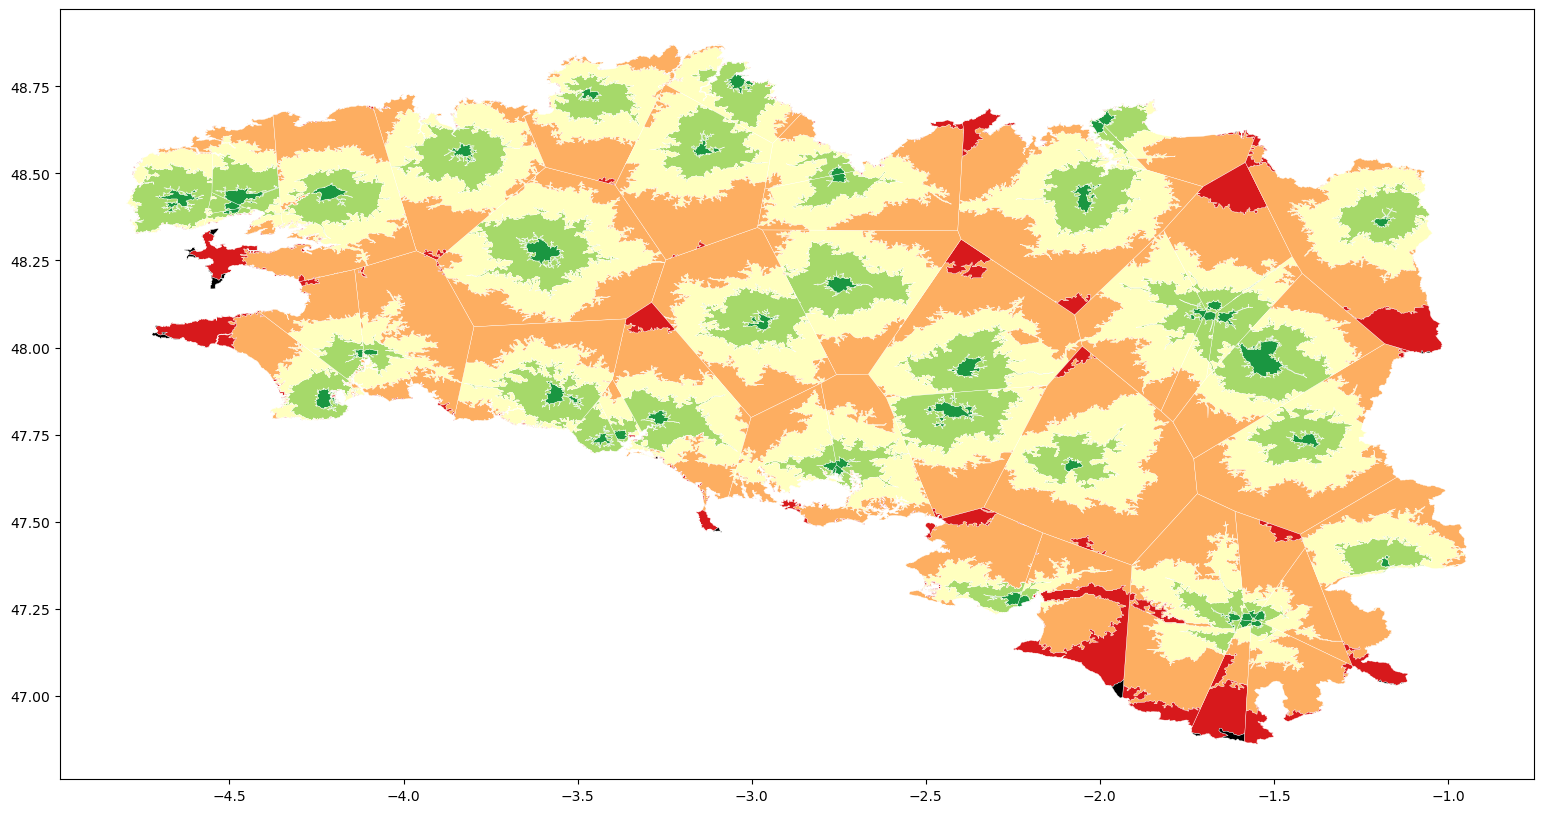

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
iso_bzh.plot(ax=ax, color=iso_bzh["costValue"].astype(str).map(corres_couleurs), linewidth=.25,edgecolor="#fff")

Avant d'enregistrer tout le travail accompli, nous allons **fusionner les zones par temps de trajet** (cela passe encore par [la fonction dissolve](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html)) :

In [45]:
iso_bzh = iso_bzh = iso_bzh[["costValue","geometry"]].dissolve(by="costValue").reset_index()

Et nous allons aussi **simplifier la géométrie afin d'alléger un peu le GeoJSON final** (qui ferait 10 Mo sinon, contre 1,3 après simplification). Cela va se passer avec [la fonction simplify_coverage](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoSeries.simplify_coverage.html), qui permet de simplifier sans avoir de trous disgracieux :

In [46]:
iso_bzh["geometry"] = iso_bzh["geometry"].simplify_coverage(.005)

La dernière étape de cette dernière partie est arrivée : nous pouvons enregistrer le fichier :

In [47]:
iso_bzh.to_file("data/dvoro_mat00.json",
                driver="GeoJSON")

/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Pour rappel, vous trouverez joints à ce repo Github les versions scriptées de ces calpeins. Pour toute remarque ou question, mon courrile : raphadasilva\[at\]proton.me